# Understanding Descriptive Statistics

Import the necessary libraries here:

In [88]:
# Libraries
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [24]:
# your code here

def rolling_dice():
    return random.choices(range(1,7), k=10)

In [25]:
df_dice = pd.DataFrame({'turn': [i for i in range(1,11)], 'value':[i for i in rolling_dice()]}).set_index('turn')

In [26]:
df_dice.T

turn,1,2,3,4,5,6,7,8,9,10
value,6,5,6,4,2,1,2,3,4,2


#### 2.- Plot the results sorted by value.

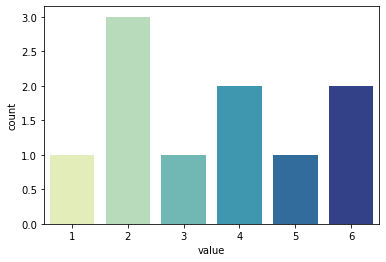

In [66]:
# your code here

sns.countplot(data=df_dice, x='value', palette='YlGnBu');

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [38]:
df_freq = df_dice.reset_index().groupby('value').count().rename(columns={'turn':'times'})
df_freq['frequency'] = df_freq['times'] / sum(df_freq['times'])
df_freq.reset_index(inplace=True)
df_freq

,value,times,frequency
0,1,1,0.1
1,2,3,0.3
2,3,1,0.1
3,4,2,0.2
4,5,1,0.1
5,6,2,0.2


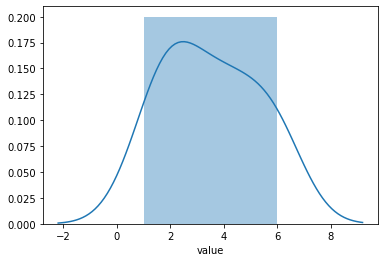

In [65]:
sns.distplot(df_dice['value']);

The plot abouve describe how the different events probability are distributed. The sum of all probabilities is 1.

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [40]:
# your code here
df_dice.T

turn,1,2,3,4,5,6,7,8,9,10
value,6,5,6,4,2,1,2,3,4,2


In [41]:
def dice_mean(x):
    return sum(x)/len(x)

dice_mean(df_dice['value'])

3.5

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [181]:
df_freq

,value,times,frequency
0,1,3,0.3
1,2,1,0.1
2,3,1,0.1
3,4,3,0.3
4,6,2,0.2


In [182]:
# your code here
dice_mean(df_freq['frequency'])

0.2

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [44]:
df_dice.T

turn,1,2,3,4,5,6,7,8,9,10
value,6,5,6,4,2,1,2,3,4,2


In [45]:
# your code here

def dice_median(x):
    
    rolls = sorted(x.to_list())
    midpoint = len(rolls) / 2
    
    if len(rolls)%2 == 0:
        return (rolls[int(midpoint-1)] + rolls[int(midpoint)]) / 2
    
    else:
        return rolls[int(midpoint-0.5)]

In [46]:
dice_median(df_dice['value'])

3.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [60]:
def dice_quartiles(x):

    Q2 = dice_median(x)
    Q1 = (x.min() + Q2) / 2
    Q3 = (x.max() + Q2) / 2
    
    print(f' Q1 = {Q1}\n Q2 = {Q2}\n Q3 = {Q3}')

In [61]:
dice_quartiles(df_dice['value'])

 Q1 = 2.25
 Q2 = 3.5
 Q3 = 4.75


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

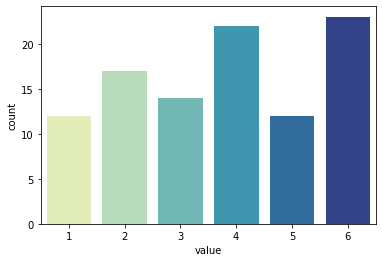

In [67]:
# your code here

df_dice_100 = pd.read_csv('../data/roll_the_dice_hundred.csv')
sns.countplot(data=df_dice_100, x='value', palette='YlGnBu');

The times each value appears tend to be more uniform than with only 10 dice rolls.

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [70]:
# your code here

dice_mean(df_dice_100['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [84]:
# your code here

df_freq = df_dice_100.reset_index().groupby('value').count().drop(['index', 'Unnamed: 0'], axis=1).rename(columns={'roll':'times'})
df_freq['frequency'] = df_freq['times'] / sum(df_freq['times'])
df_freq.reset_index(inplace=True)
df_freq

,value,times,frequency
0,1,12,0.12
1,2,17,0.17
2,3,14,0.14
3,4,22,0.22
4,5,12,0.12
5,6,23,0.23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

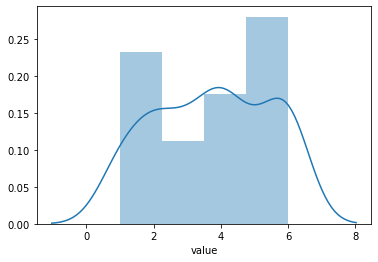

In [85]:
# your code here

sns.distplot(df_dice_100['value']);

The line showing the probability of each event tend to be more flat. It indicates when we do the experiment more times, the number of times each value appears tend to be the same.

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

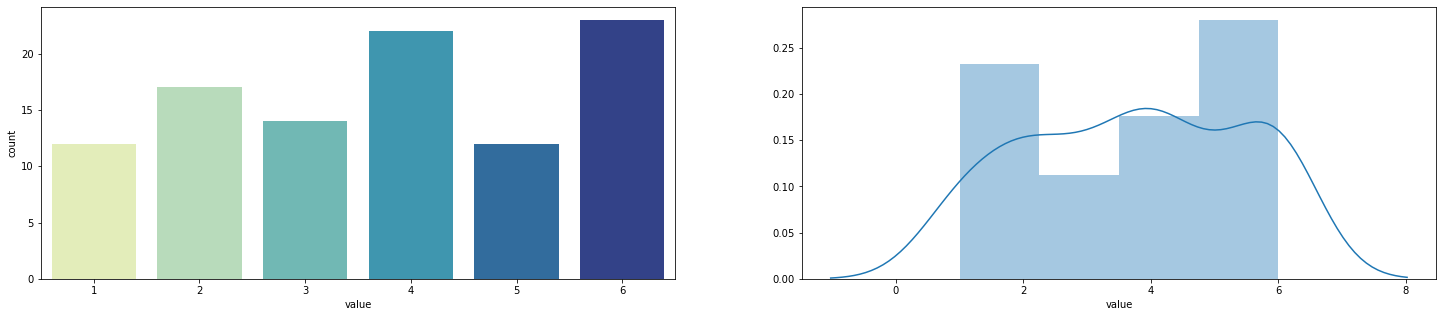

In [96]:
# your code here

df_dice_1000 = pd.read_csv('../data/roll_the_dice_thousand.csv')

fig, axes = plt.subplots(ncols=2, nrows =1, figsize = (25,5))
sns.countplot(data=df_dice_100, x='value', palette='YlGnBu', ax=axes[0])
sns.distplot(df_dice_100['value'], ax=axes[1]);

When we increase the number of observations, the values tend to appear the same number of times.

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [98]:
# your code here
df_ages_population = pd.read_csv('../data/ages_population.csv')
df_ages_population

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


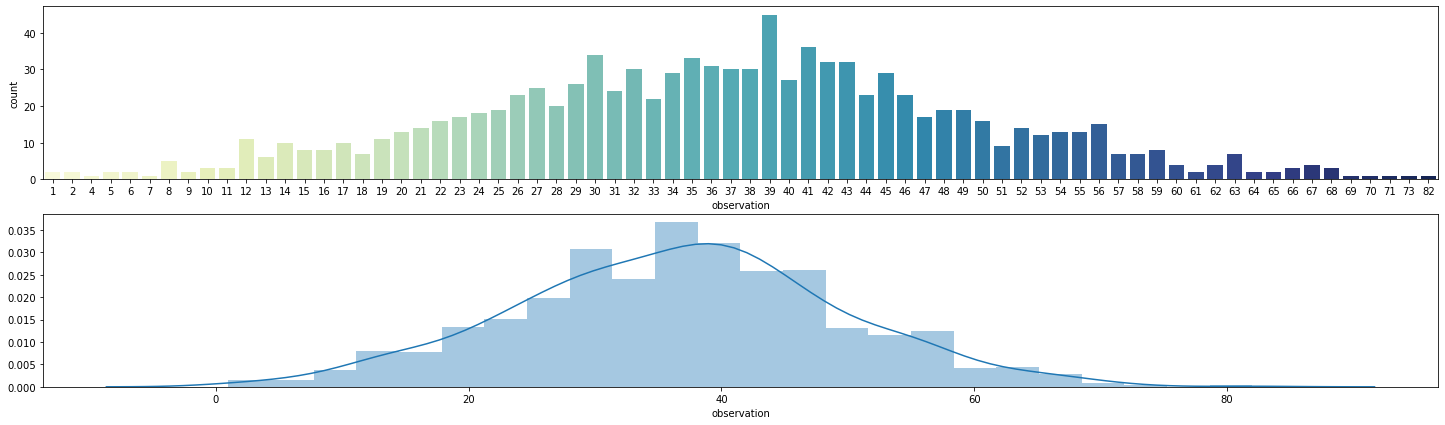

In [160]:
fig, axes = plt.subplots(ncols=1, nrows =2, figsize = (25,7))
sns.countplot(x=df_ages_population['observation'].astype(int), ax=axes[0], palette='YlGnBu')

sns.distplot(df_ages_population['observation'], ax=axes[1]);

The mean would be arround 39 years old.

No idea about the standard deviation... : /

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [157]:
# your code here

print('The mean is: ' + str(df_ages_population['observation'].mean()))
print('The standard deviation is: ' + str(df_ages_population['observation'].std().round(2)))


The mean is: 36.56
The standard deviation is: 12.82


#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

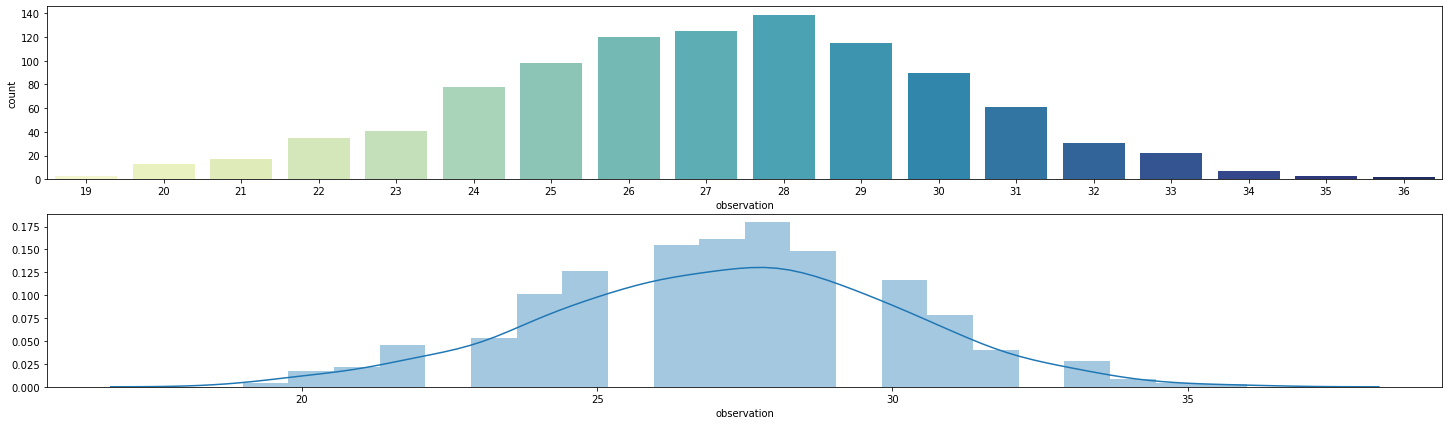

In [161]:
# your code here

df_ages_population2 = pd.read_csv('../data/ages_population2.csv')

fig, axes = plt.subplots(ncols=1, nrows =2, figsize = (25,7))
sns.countplot(x=df_ages_population2['observation'].astype(int), ax=axes[0], palette='YlGnBu')

sns.distplot(df_ages_population2['observation'], ax=axes[1]);

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

Although the age range is smaller than the first example, the distribution seems very similar.

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [162]:
# your code here

print('The mean is: ' + str(df_ages_population2['observation'].mean()))
print('The standard deviation is: ' + str(df_ages_population2['observation'].std().round(2)))

The mean is: 27.155
The standard deviation is: 2.97


The mean can be observed on the plots.

The standar deviation is much smaller. I guess it's because the age range is smaller so the values are closer to the mean. ??

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

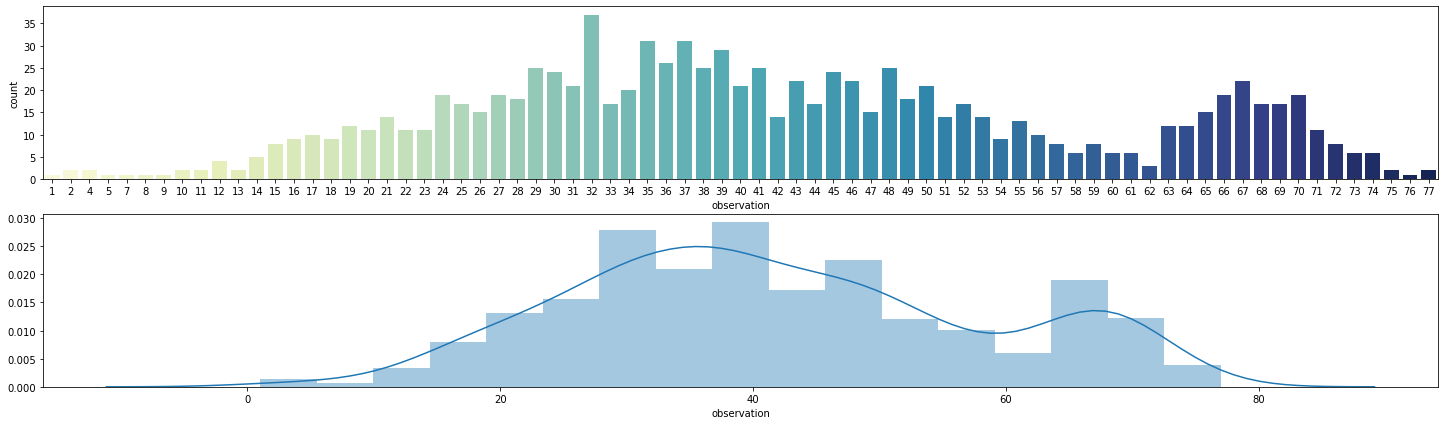

In [163]:
# your code here

df_ages_population3 = pd.read_csv('../data/ages_population3.csv')

fig, axes = plt.subplots(ncols=1, nrows =2, figsize = (25,7))
sns.countplot(x=df_ages_population3['observation'].astype(int), ax=axes[0], palette='YlGnBu')

sns.distplot(df_ages_population3['observation'], ax=axes[1]);

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [164]:
# your code here

print('The mean is: ' + str(df_ages_population3['observation'].mean()))
print('The standard deviation is: ' + str(df_ages_population3['observation'].std().round(2)))

The mean is: 41.989
The standard deviation is: 16.14


In this dataset there is two big groups of population: 30-50 and in their 60's,
The standard deviation is bigger since observations are more spreaded.

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [169]:
# your code here

df_ages_population3['observation'].quantile([0.25, 0.5, 0.75])

0.25    30.0
0.50    40.0
0.75    53.0
Name: observation, dtype: float64

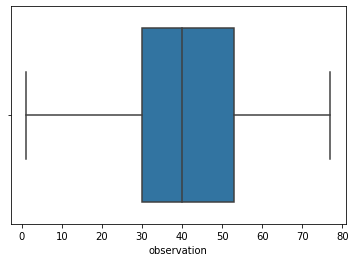

In [172]:
sns.boxplot(df_ages_population3['observation']);

There is a big group of population between 30 and 50 years

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [177]:
# your code here

df_ages_population3['observation'].quantile(np.arange(0.0, 1.0, 0.2))

0.0     1.0
0.2    28.0
0.4    36.0
0.6    45.0
0.8    57.0
Name: observation, dtype: float64

Almost all population is between 0.6 and 0.2 percentil (28-57 years old).

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

''

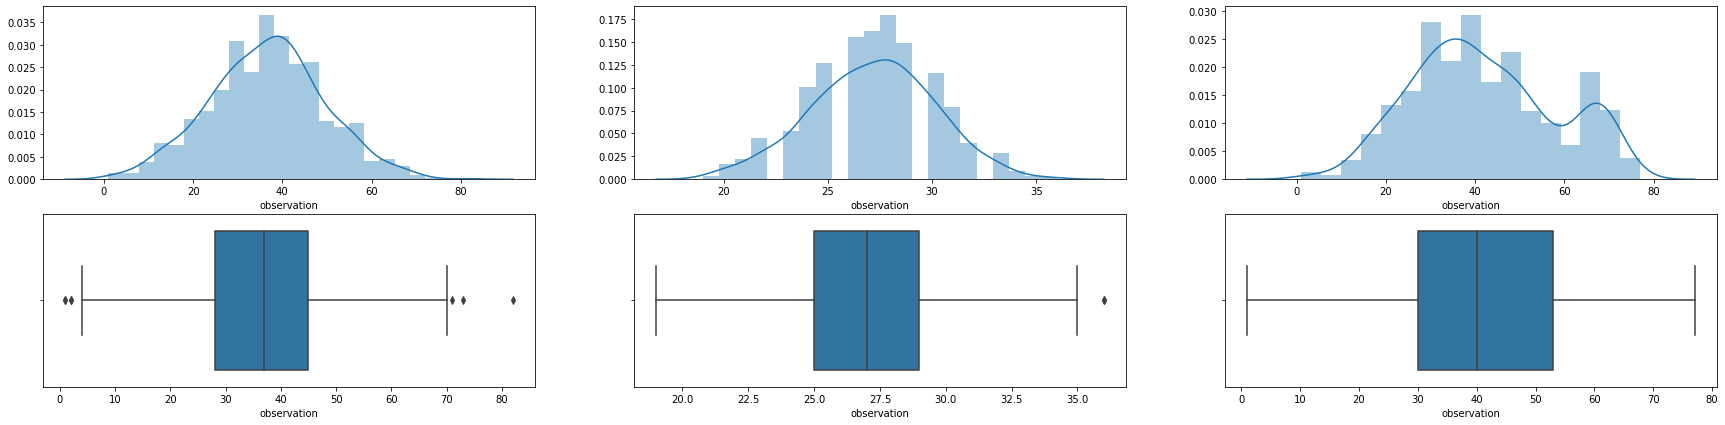

In [182]:
# your code here

fig, axes = plt.subplots(ncols=3, nrows =2, figsize = (30,7))

sns.distplot(df_ages_population['observation'], ax=axes[0][0])
sns.boxplot(df_ages_population['observation'], ax=axes[1][0])

sns.distplot(df_ages_population2['observation'], ax=axes[0][1])
sns.boxplot(df_ages_population2['observation'], ax=axes[1][1])

sns.distplot(df_ages_population3['observation'], ax=axes[0][2])
sns.boxplot(df_ages_population3['observation'], ax=axes[1][2])
;

First and second neighbourhoods have a normal distribution where ages are concentrated on the intermediate values, although the second neighbouhood is much younger. It can be seen on the box plot than the range between 0.25 and 0.75 quartiles are narrower.

The third one has more older population, therefore the distribution isn't normal and de range where the population is concentrated is wider, between 30 and 55 years aprox.